# Data augmentation en faisant du flip horizontal et vertical 180°


## Connection drive

Dans un premier temps, connectez-vous au drive pour accéder au dataset :

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importation des librairies pytorch

In [48]:
import torch
from torch import optim
from torch import Tensor
from torch import nn
from torch.nn import functional as F

In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Data augmentation du `validation set` pour le modèle discriminant qui prend le `validation set` comme `training set`

### Flip horizontal et vertical 180°

Installez la librairie torchvsion si vous ne l'avez pas déjà installée :

In [50]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import torch
import torchvision.transforms as transforms

# Chargement des données du validation set
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/DeepL_Project/dataset/val_data.pkl')

# Normalisation des données
noisy_imgs = noisy_imgs/255
clean_imgs = clean_imgs/255

# Définition des transformations : horizontal et vertical 180
transformations_h = transforms.RandomHorizontalFlip(p=1)
transformations_v = transforms.RandomVerticalFlip(p=1)

# Application et concaténation des transformations sur les données 
augmented_noisy_imgs = []
augmented_clean_imgs = []

for i in range(len(noisy_imgs)):
    noisy_img = noisy_imgs[i]
    clean_img = clean_imgs[i]
    
    # Application des transformations sur chaque paire d'images
    transformed_h_noisy_img = transformations_h(noisy_img)
    transformed_h_clean_img = transformations_h(clean_img)
    
    augmented_noisy_imgs.append(transformed_h_noisy_img)
    augmented_clean_imgs.append(transformed_h_clean_img)

    transformed_v_noisy_img = transformations_v(noisy_img)
    transformed_v_clean_img = transformations_v(clean_img)
    
    augmented_noisy_imgs.append(transformed_v_noisy_img)
    augmented_clean_imgs.append(transformed_v_clean_img)

# Concaténation des données augmentées avec les données originales
noisy_imgs = torch.cat((noisy_imgs, torch.stack(augmented_noisy_imgs)))
clean_imgs = torch.cat((clean_imgs, torch.stack(augmented_clean_imgs)))

# Enregistrement des données augmentées dans un nouveau fichier pickle
torch.save((noisy_imgs, clean_imgs), '/content/drive/MyDrive/DeepL_Project/dataset/augmented_val_data.pkl')


## Data augmentation du `train set` comme les réseaux ResNet et U-Net

### Flip horizontal et vertical 180°

In [69]:
import torch
import torchvision.transforms as transforms

# Chargement des données du train set
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/DeepL_Project/dataset/train_data.pkl')

# Normalisation des données
noisy_imgs_1 = noisy_imgs_1/255
noisy_imgs_2 = noisy_imgs_2/255

# Définition des transformations : horizontal et vertical 180
transformations_h = transforms.RandomHorizontalFlip(p=1)
transformations_v = transforms.RandomVerticalFlip(p=1)

# Application et concaténation des transformations sur les données 
augmented_noisy_imgs_1 = []
augmented_noisy_imgs_2 = []

for i in range(len(noisy_imgs_1)):
    noisy_img_1 = noisy_imgs_1[i]
    noisy_img_2 = noisy_imgs_2[i]
    
    # Application des transformations sur chaque paire d'images
    transformed_h_noisy_img_1 = transformations_h(noisy_img_1)
    transformed_h_noisy_img_2 = transformations_h(noisy_img_2)
    
    augmented_noisy_imgs_1.append(transformed_h_noisy_img_1)
    augmented_noisy_imgs_2.append(transformed_h_noisy_img_2)

    transformed_v_noisy_img_1 = transformations_v(noisy_img_1)
    transformed_v_noisy_img_2 = transformations_v(noisy_img_2)
    
    augmented_noisy_imgs_1.append(transformed_v_noisy_img_1)
    augmented_noisy_imgs_2.append(transformed_v_noisy_img_2)

# Concaténation des données augmentées avec les données originales
noisy_imgs_1 = torch.cat((noisy_imgs_1, torch.stack(augmented_noisy_imgs_1)))
noisy_imgs_2 = torch.cat((noisy_imgs_2, torch.stack(augmented_noisy_imgs_2)))

# Enregistrement des données augmentées dans un nouveau fichier pickle
torch.save((noisy_imgs_1, noisy_imgs_2), '/content/drive/MyDrive/DeepL_Project/dataset/augmented_train_data.pkl')


### Permutation aléatoire des couleurs (taillex2)

In [ ]:
for i in range(len(noisy_imgs_1)):
    noisy_img_1 = noisy_imgs_1[i]
    noisy_img_2 = noisy_imgs_2[i]
    r = random.randint(3)
    noisy_img_1_copy = noisy_imgs_1[i].copy()
    noisy_img_2_copy = noisy_imgs_2[i].copy()
    if(r==1):
        noisy_img_1_copy[0]=noisy_img_1[1]
        noisy_img_1_copy[1]=noisy_img_1[0]
        noisy_img_2_copy[0]=noisy_img_2[1]
        noisy_img_2_copy[1]=noisy_img_2[0]
    elif(r==2):
        noisy_img_1_copy[1]=noisy_img_1[2]
        noisy_img_1_copy[2]=noisy_img_1[1]
        noisy_img_2_copy[1]=noisy_img_2[2]
        noisy_img_2_copy[2]=noisy_img_2[1]
    elif(r==2):
        noisy_img_1_copy[0]=noisy_img_1[2]
        noisy_img_1_copy[2]=noisy_img_1[0]
        noisy_img_2_copy[0]=noisy_img_2[2]
        noisy_img_2_copy[2]=noisy_img_2[0]
        
    augmented_noisy_imgs_1.append(noisy_img_1_copy)
    augmented_noisy_imgs_2.append(noisy_img_2_copy)

# Enregistrement des données augmentées dans un nouveau fichier pickle
torch.save((noisy_imgs_1, noisy_imgs_2), '/content/drive/MyDrive/DeepL_Project/dataset/color_augmented_train_data.pkl')

## Visualisation des données augmentées

In [70]:
noisy_imgs_1 , noisy_imgs_2 = torch.load('/content/drive/MyDrive/DeepL_Project/dataset/augmented_train_data.pkl')
noisy_imgs , clean_imgs = torch.load('/content/drive/MyDrive/DeepL_Project/dataset/augmented_val_data.pkl')

print(noisy_imgs_1.shape)
print(noisy_imgs.shape)

torch.Size([150000, 3, 32, 32])
torch.Size([3000, 3, 32, 32])


In [71]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Clean_imgs_flip from the validation set')

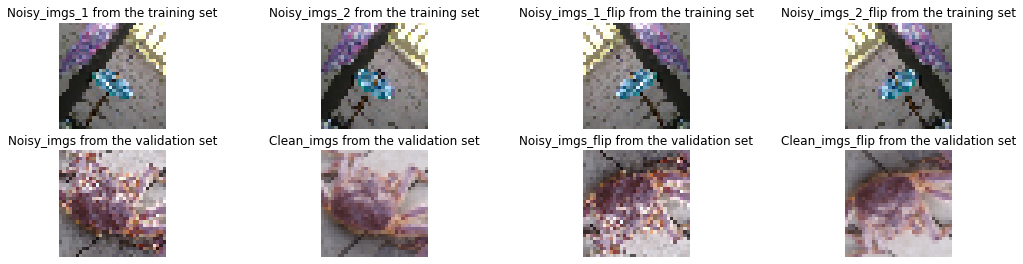

In [82]:
# create figure
fig = plt.figure(figsize=(18, 9))
    
# setting values to rows and column variables
rows = 4
columns = 4

# adds a subplot
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(noisy_imgs_1[0].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Noisy_imgs_1 from the training set")

# adds a subplot
fig.add_subplot(rows, columns, 2)
    
# showing image
plt.imshow(noisy_imgs_2[0].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Noisy_imgs_2 from the training set")

# adds a subplot
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(noisy_imgs_1[50000].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Noisy_imgs_1_flip from the training set")

# adds a subplot
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(noisy_imgs_2[50000].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Noisy_imgs_2_flip from the training set")
      
# adds a subplot 
fig.add_subplot(rows, columns, 5)
      
# showing image
plt.imshow(noisy_imgs[0].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Noisy_imgs from the validation set")

# adds a subplot 
fig.add_subplot(rows, columns, 6)

# showing image
plt.imshow(clean_imgs[0].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Clean_imgs from the validation set")

# adds a subplot 
fig.add_subplot(rows, columns, 7)
      
# showing image
plt.imshow(noisy_imgs[1001].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Noisy_imgs_flip from the validation set")

# adds a subplot 
fig.add_subplot(rows, columns, 8)

# showing image
plt.imshow(clean_imgs[1001].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Clean_imgs_flip from the validation set")